In [1]:
%cd ..

/home/sandor/dtu/2021-22-spring/advanced_machine_learning/p-reg


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable

def add_colorbar(im, fig, ax):
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')


df = pd.read_csv('reports/figures/acc_on_mu_and_neurons.csv')
df['icd0'] = df['icd0'].apply(lambda l: float(l.split('(')[-1].split(')')[0]))
print(df.head())
# ridiculously slow implementation, but I don't want to figure this out now
arr = np.zeros((df['hidden_channels'].unique().shape[0], df['mu'].unique().shape[0]))
for ind_i, i in enumerate(df['hidden_channels'].unique()):
    for ind_j, j in enumerate(df['mu'].unique()):
        # print((df['hidden_channels'] == i) & (df['mu'] == j))
        # print(df[(df['hidden_channels'] == i) & (df['mu'] == j)]['test_acc'])
        arr[ind_i,ind_j] = df[(df['hidden_channels'] == i) & (df['mu'] == j)]['icd0'].mean()
# plt.pcolormesh()



fig, ax = plt.subplots()
im = ax.pcolormesh(list(map(lambda l: 2*l, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20])), [1, 2, 4, 8, 16, 32, 64, 128, 256], arr, )
ax.set_yscale('log')
ax.set_yticks([1, 2, 4, 8, 16, 32, 64, 128, 256])
ax.set_yticklabels([1, 2, 4, 8, 16, 32, 64, 128, 256])
add_colorbar(im, fig, ax)
ax.set(xlabel='Regularization factor', ylabel='No. neurons in hidden layer')
ax.legend()
plt.show()


   Unnamed: 0   mu  seed  train_acc  val_acc  test_acc    icd0      icd1  \
0           0  0.0    11        1.0    0.794     0.806  1.8117  1.933081   
1           1  0.1    11        1.0    0.796     0.813  1.7310  2.487440   
2           2  0.2    11        1.0    0.804     0.815  1.6467  3.075347   
3           3  0.3    11        1.0    0.818     0.825  1.5585  3.613424   
4           4  0.4    11        1.0    0.812     0.830  1.5155  4.144387   

       icd2      icd3  icd4_train  icd4_val  icd4_test  
0  0.000103  0.992504    0.001743  0.001184   0.000223  
1  0.000133  1.133780    0.002177  0.001474   0.000337  
2  0.000170  1.264864    0.002646  0.001783   0.000488  
3  0.000217  1.372631    0.003098  0.002146   0.000671  
4  0.000261  1.469553    0.003521  0.002463   0.000847  


KeyError: 'hidden_channels'

,Unnamed: 0,mu,seed,train_acc,val_acc,test_acc,icd0
0,0,0.0,0,1.0,0.788,0.807,0.226107
1,1,0.2,0,1.0,0.808,0.825,0.199243
2,2,0.4,0,1.0,0.816,0.832,0.171764
3,3,0.6,0,1.0,0.808,0.838,0.151593
4,4,0.8,0,1.0,0.800,0.838,0.137553


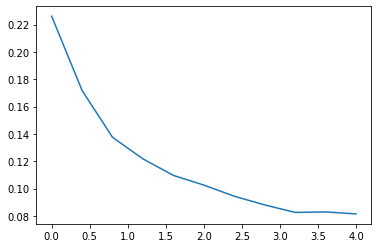

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('reports/figures/experiment_icd.csv')

plt.plot(df['mu'], df['icd0'])